# Chargement des images

In [3]:
import os  # Importer tout le module os 
from PIL import Image  # Importer uniquement la classe Image du module PIL
import numpy as np  # Importer tout le module numpy

# Les chemins des mes datasets sous W10
train_folder = '../../datasets/train'
validation_folder = '../../datasets/val'
test_folder = '../../datasets/test'

# Fonctions pour charger les images et labels du dossier passé en paramètres de la fonction
def load_images_from_folder(folder):
    # Initialisation de tableaux vides
    images = []
    labels = []
    # Permet d'attribuer un label selon le type de sous dossiers
    for subfolder in ['NORMAL', 'PNEUMONIA']:
        if subfolder == 'PNEUMONIA':
            label = 1
        else:
            label = 0
        # Le chemin absolu du sous dossier
        subfolder_path = os.path.join(folder, subfolder)
        # Boucle sur l'ensemble des fichiers du sous dossier
        for filename in os.listdir(subfolder_path):
            # Le chemin de l'image
            img_path = os.path.join(subfolder_path, filename)
            # Ouvre l'image et la convertit en niveaux de gris (L pour luminance)
            img = Image.open(img_path).convert('L')
            # Change la taille de l'image à 128x128 pixels pour uniformiser toutes les images
            img = img.resize((128, 128))
            # Convertit l'image redimensionnée en tableau Numpy
            img_array = np.array(img)
            # Ajoute l'image sous forme de tableau à la liste des images
            images.append(img_array)
            # Ajoute l'étiquette correspondante à la liste des labels
            labels.append(label)
    # Retourne 2 tableaux Numpy ou on aura les images et les labels
    return np.array(images), np.array(labels)

# Chargement des datasets
# X_train sera les images d'entrainement, y_train sera les labels d'entrainement
X_train, y_train = load_images_from_folder(train_folder)
# X_validation sera les images de validation, y_validation sera les labels de validation
X_validation, y_validation = load_images_from_folder(validation_folder)
# X_test sera les images de test, y_test sera les labels de test
X_test, y_test = load_images_from_folder(test_folder)

# Visualise les données dans la console
print(f'Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Val data shape: {X_validation.shape}, Val labels shape: {y_validation.shape}')
print(f'Test data shape: {X_test.shape}, test labels shape: {y_test.shape}')

Train data shape: (2680, 128, 128), Train labels shape: (2680,)
Val data shape: (16, 128, 128), Val labels shape: (16,)
Test data shape: (624, 128, 128), test labels shape: (624,)


# Visualisation des images

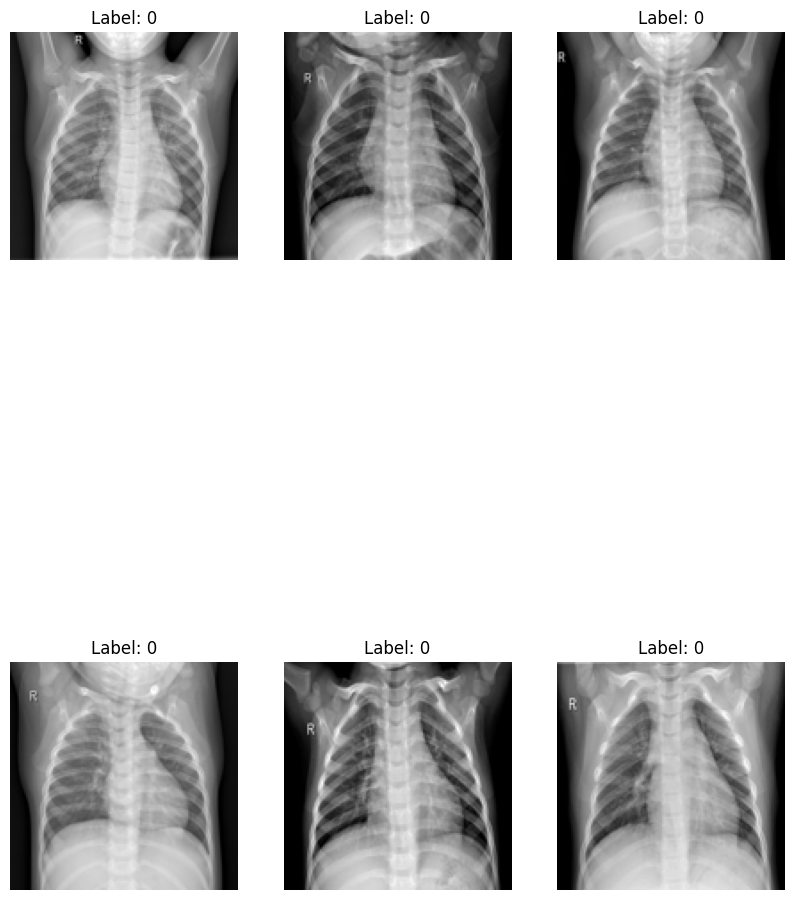

In [4]:
import matplotlib.pyplot as plt  # Importer tout le module pyplot de matplotlib

# Donner une dimension à l'affichage
plt.figure(figsize=(10, 15))
# Afficher les images
for i in range(6):
    # Permet de spécifier l'affichage, le + 1 permet de spécifier l'index ou commencer l'affichage
    plt.subplot(2, 3, i + 1)
    # Gère l'affichage
    plt.imshow(X_train[i], cmap='gray')
    # Mets un titre dynamique aux images
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

# Prétraitement des données

In [6]:
# Normalisation des images d'entraînement et de validation
# Divise chaque pixel par 255 pour que les valeurs des pixels soient comprises entre 0 et 1
X_train = X_train / 255.0
X_validation = X_validation / 255.0
X_test = X_test / 255.0

# Transformation des images en vecteurs 1D
# Reshape des données d'entraînement : chaque image de 128x128 pixels est convertie en un vecteur de 16384 éléments (128 * 128)
X_train = X_train.reshape(X_train.shape[0], -1)
X_validation = X_validation.reshape(X_validation.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# from sklearn.model_selection import train_test_split  # Importer uniquement la fonction train_test_split de sklearn

# Division des données d'entraînement en ensembles d'entraînement et de validation internes
# test_size=0.2 signifie que 20% des données seront utilisées pour la validation interne
# random_state=42 fixe la graine du générateur aléatoire pour que les résultats soient reproductibles
# X_train, X_val_internal, y_train, y_val_internal = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles
print(f'Ensemble d\'entraînement : {X_train.shape}, {y_train.shape}')
print(f'Ensemble de validation : {X_validation.shape}, {y_validation.shape}')
print(f'Ensemble de test : {X_test.shape}, {y_test.shape}')

Ensemble d'entraînement : (2680, 16384), (2680,)
Ensemble de validation : (16, 16384), (16,)
Ensemble de test : (624, 16384), (624,)


# Création du modèle "Arbre de décision" et entrainement de ce modèle sur un datasets

In [7]:
# Importer la classe DecisionTreeClassifier de sklearn
from sklearn.tree import DecisionTreeClassifier

# Initialisation du modèle d'arbre de décision avec une graine aléatoire pour reproductibilité
model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle avec les données d'entraînement
model.fit(X_train, y_train)

# Importer les fonctions nécessaires pour évaluer le modèle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prédiction des étiquettes sur l'ensemble du dossier test
y_pred_test = model.predict(X_test)

# Évaluation des performances du modèle sur l'ensemble de test
print(f'Test - Accuracy : {accuracy_score(y_test, y_pred_test)}')
print(f'Test - Confusion Matrix :\n{confusion_matrix(y_test, y_pred_test)}')
print(f'Test - Classification Report :\n{classification_report(y_test, y_pred_test)}')

Test - Accuracy : 0.7740384615384616
Test - Confusion Matrix :
[[125 109]
 [ 32 358]]
Test - Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       234
           1       0.77      0.92      0.84       390

    accuracy                           0.77       624
   macro avg       0.78      0.73      0.74       624
weighted avg       0.78      0.77      0.76       624



# Optimisation progressive des hyperparamètres
## max_depth

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_step1 = {
    'max_depth': [None, 10, 20, 30, 40, 50],
}

dt_step1 = DecisionTreeClassifier(random_state=42)

grid_search_step1 = GridSearchCV(estimator=dt_step1, param_grid=param_grid_step1, cv=5, n_jobs=-1, verbose=2)
grid_search_step1.fit(X_train, y_train)
best_params_step1 = grid_search_step1.best_params_

print(f"Meilleurs paramètres pour max_depth: {best_params_step1}")

## criterion

In [ ]:
param_grid_step2 = {
    'criterion': ['gini', 'entropy']
}

dt_step2 = DecisionTreeClassifier(**best_params_step1, random_state=42)

grid_search_step2 = GridSearchCV(estimator=dt_step2, param_grid=param_grid_step2, cv=5, n_jobs=-1, verbose=2)
grid_search_step2.fit(X_train, y_train)
best_params_step2 = {**best_params_step1, **grid_search_step2.best_params_}

print(f"Meilleurs paramètres pour criterion : {grid_search_step2.best_params_}")

## min_samples_split

In [ ]:
param_grid_step3 = {
    'min_samples_split': [2, 5, 10]
}

dt_step3 = DecisionTreeClassifier(**best_params_step2, random_state=42)
grid_search_step3 = GridSearchCV(estimator=dt_step3, param_grid=param_grid_step3, cv=5, n_jobs=-1, verbose=2)
grid_search_step3.fit(X_train, y_train)
best_params_step3 = {**best_params_step2, **grid_search_step3.best_params_}

print(f"Meilleurs paramètres pour min_samples_split : {grid_search_step3.best_params_}")

## min_samples_leaf

In [ ]:
param_grid_step4 = {
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

dt_step4 = DecisionTreeClassifier(**best_params_step3, random_state=42)
grid_search_step4 = GridSearchCV(estimator=dt_step4, param_grid=param_grid_step4, cv=5, n_jobs=-1, verbose=2)
grid_search_step4.fit(X_train, y_train)
best_params_step4 = {**best_params_step3, **grid_search_step4.best_params_}

print(f"Meilleurs paramètres pour min_samples_leaf : {grid_search_step4.best_params_}")

# Modèle final avec tous les meilleurs paramètres
best_model_make_by_step = grid_search_step4.best_estimator_

## Tester le modèle

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_test = best_model_make_by_step.predict(X_test)
print(f'Test - Accuracy : {accuracy_score(y_test, y_pred_test)}')
print(f'Test - Confusion Matrix :\n{confusion_matrix(y_test, y_pred_test)}')
print(f'Test - Classification Report :\n{classification_report(y_test, y_pred_test)}')

# Optimisation globale des hyperparamètres

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Création d'un dictionnaire pour passer les hyperparamètres à optimiser
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

from sklearn.model_selection import train_test_split
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.3, stratify=y_train, random_state=42)
print(f'Taille du dataset d\'entraînement réduit : {X_train_small.shape}, {y_train_small.shape}')

dt = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5)

# Utilisation de GridSearchCV pour trouver le modèle avec les meilleurs hyperparamètres en comparant les différentes performances de chaque combinaison grâce à la technique de "Cross-validation"
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, n_jobs=1, verbose=2)
grid_search.fit(X_train_small, y_train_small)

print(f"Le meilleur score trouvé: {grid_search.best_score_}")
print(f"Meilleurs paramètres trouvé: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

Taille du dataset d'entraînement réduit : (804, 16384), (804,)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   3.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   3.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   4.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   4.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   4.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_

# Tester le modèle et l'évaluer sur les données val et test

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_test = best_model.predict(X_test)
print(f'Test - Accuracy : {accuracy_score(y_test, y_pred_test)}')
print(f'Test - Confusion Matrix :\n{confusion_matrix(y_test, y_pred_test)}')
print(f'Test - Classification Report :\n{classification_report(y_test, y_pred_test)}')

Test - Accuracy : 0.7147435897435898
Test - Confusion Matrix :
[[107 127]
 [ 51 339]]
Test - Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.46      0.55       234
           1       0.73      0.87      0.79       390

    accuracy                           0.71       624
   macro avg       0.70      0.66      0.67       624
weighted avg       0.71      0.71      0.70       624



# On a déjà le meilleur modèle possible et on affiche les métriques

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Création du modèle à l'aide de la lib de "Scikit-Learn"
meilleur_modele = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5, random_state=42)
meilleur_modele.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Évaluation du modèle optimal sur l'ensemble de test
y_pred_test = meilleur_modele.predict(X_test)
print(f'Test - Accuracy : {accuracy_score(y_test, y_pred_test)}')
print(f'Test - Confusion Matrix :\n{confusion_matrix(y_test, y_pred_test)}')
print(f'Test - Classification Report :\n{classification_report(y_test, y_pred_test)}')

Test - Accuracy : 0.7724358974358975
Test - Confusion Matrix :
[[127 107]
 [ 35 355]]
Test - Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.54      0.64       234
           1       0.77      0.91      0.83       390

    accuracy                           0.77       624
   macro avg       0.78      0.73      0.74       624
weighted avg       0.77      0.77      0.76       624



# Visualiser la courbe de ROC

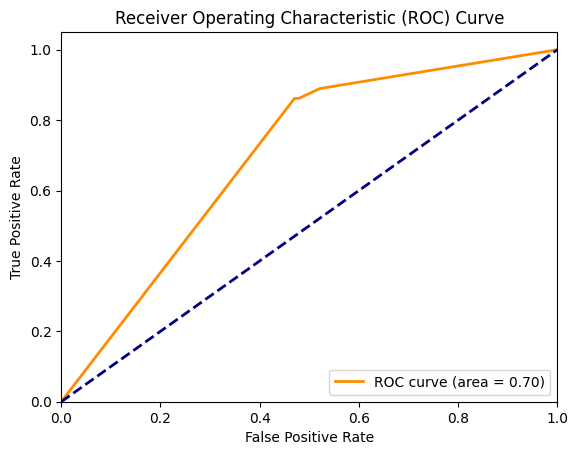

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prédiction des probabilités pour l'ensemble de test
y_pred_prob = meilleur_modele.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Visualiser l'arbre de décision, sa racine, ses feuilles et ses noeuds

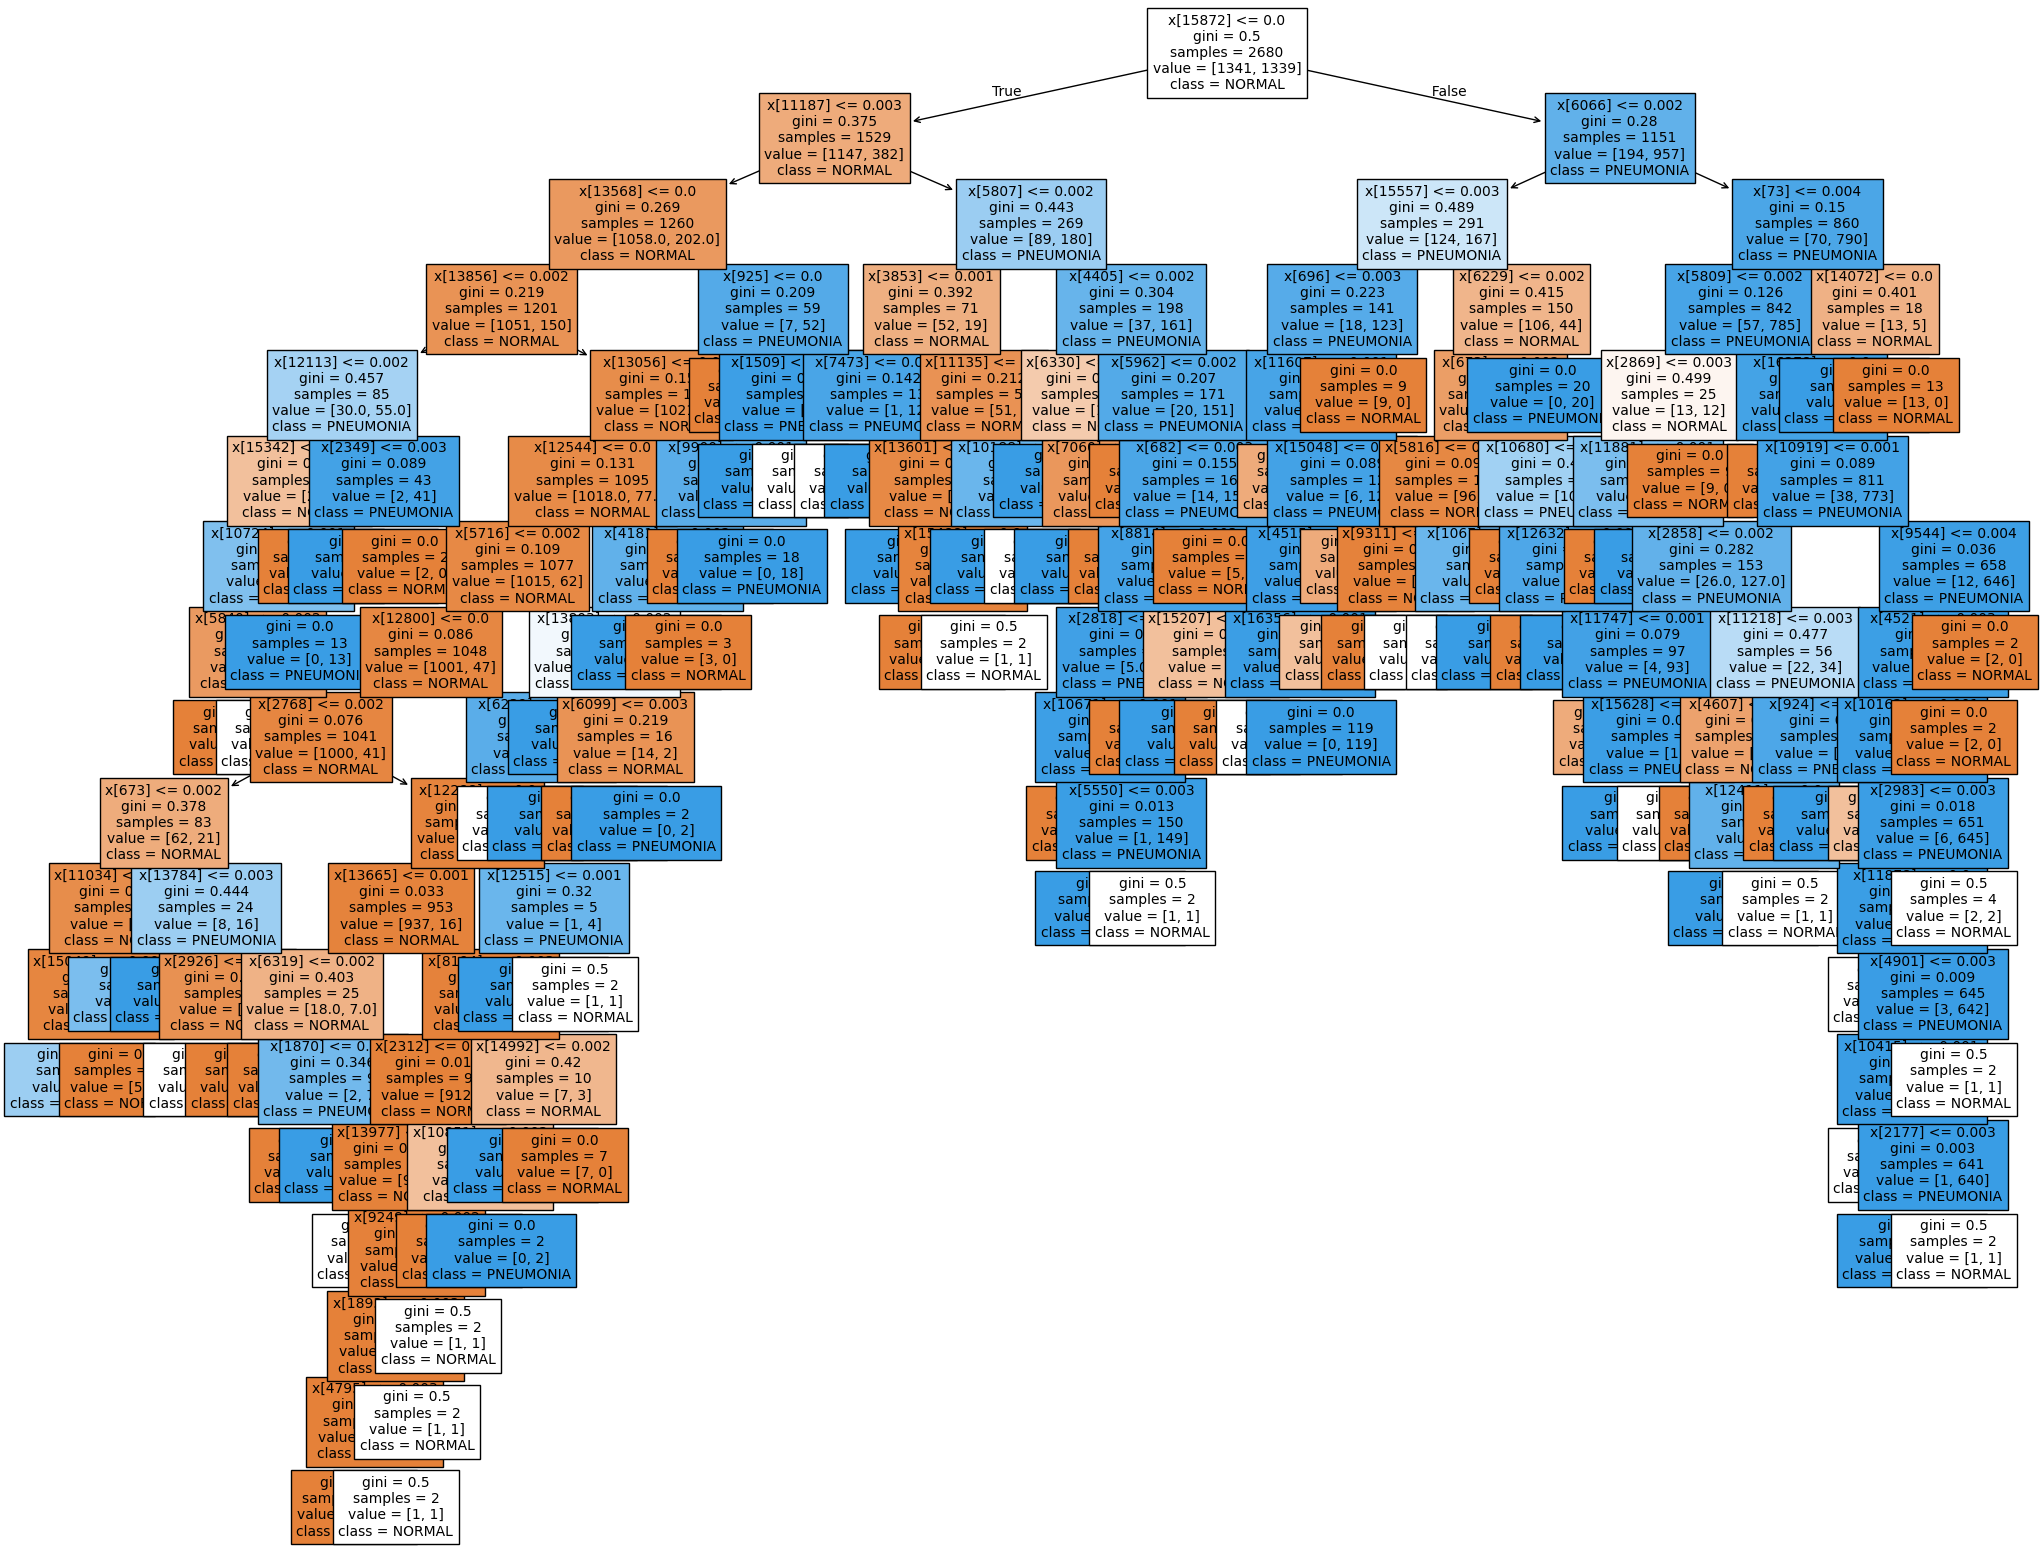

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))
plot_tree(meilleur_modele, filled=True, feature_names=None, class_names=['NORMAL', 'PNEUMONIA'], fontsize=10)
plt.show()